#  <center> </center>
# <center>Trabajo Practico 1 </center>
### <center>Grupo 10 </center>
## Integrantes:
#### Alan Richmond
#### Flavian Ferré
#### Camila Lucia Avalos
#### Alan Mejia

# 0. Inicializacion de los datos

### Importando Librerias


In [28]:
#Manipulacion de datos
import pandas as pd
import numpy as np
import seaborn as sns

from pandas.plotting import scatter_matrix

### Seleccion de datos

Cargamos el archivo de datos en un dataframe de Pandas

In [3]:
df_properati = pd.read_csv('Datasets/properati_argentina_2021.csv')

Realizamos una copia del dataset sobre el cual vamos a trabajar para no alterar los datos originales

In [4]:
df_trabajo = df_properati.copy()

#cantidad de columnas y filas del df inicial

In [5]:
df_trabajo.shape

(460154, 20)

#Filtrado de los datos que se van a utilizar.

In [6]:
#filtrando solo las propiedades que esten publicadas en dolares
filtrado_de_moneda = (df_trabajo["property_currency"] == "USD")

In [7]:
#filtrando solo las propiedades que sean casa,ph y departamento
tipos_propiedad = ["Casa", "PH", "Departamento"]
filtrado_de_vivienda = (df_trabajo["property_type"].isin(tipos_propiedad))

In [8]:
#filtrando solo las propiedades que esten en Venta
filtrado_de_operacion = (df_trabajo["operation"] == "Venta")

In [9]:
#filtrando solo las propiedades que esten ubicadas en capital federal
filtrado_de_ubicacion = (df_trabajo["place_l2"] == "Capital Federal")

In [10]:
# Se juntan todos los filtrados que se tienen que cumplir
filtrados_unidos = filtrado_de_moneda & filtrado_de_vivienda & filtrado_de_operacion & filtrado_de_ubicacion

In [11]:
df_filtrado = df_trabajo[filtrados_unidos]

Cantidad de Filas y Columnas que quedaron luego de la filtracion

In [12]:
df_filtrado.shape

(94249, 20)

### Dividir en conjuntos de entrenamiento y prueba

In [13]:
total_filas = len(df_filtrado)
filas_entrenamiento = int(0.8 * total_filas)

conjunto_entrenamiento = df_filtrado[:filas_entrenamiento]
conjunto_prueba = df_filtrado[filas_entrenamiento:]


#Conjunto de entrenamiento

In [14]:
#Imprime las primeras filas del conjunto de entrenamiento
print("Conjunto de Entrenamiento:")
conjunto_entrenamiento.head()



Conjunto de Entrenamiento:


,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
25,CyZu6IaZgmQYGk8jmPajCg==,2021-09-09,2021-09-26,2021-09-09,NaN,NaN,Capital Federal,NaN,NaN,NaN,NaN,Venta,Casa,4.0,3.0,171.0,133.0,210000.0,USD,VENTA CASA LLAVE EN MANO - COSTA ESMERALDA
42,d3Z0MblSb2IMBoOBMGJEEQ==,2021-09-09,2021-09-26,2021-09-09,-34.637319,-58.361124,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,3.0,2.0,58.0,55.0,82900.0,USD,VENTA TRES AMBIENTES LA BOCA PISO ALTO
43,rL7qPkQnomsMGu2ViS3sBw==,2021-09-09,2021-09-28,2021-09-09,-34.628647,-58.361871,Capital Federal,Boca,NaN,NaN,NaN,Venta,Departamento,4.0,3.0,70.0,70.0,99000.0,USD,Departamento - 4 Ambientes - Catalinas Sur
49,vuX/ccLAMVml4qWRFcOJUA==,2021-09-09,2022-01-05,2021-09-09,-34.610027,-58.401934,Capital Federal,Once,NaN,NaN,NaN,Venta,Departamento,4.0,2.0,NaN,104.0,146000.0,USD,Venta departamento 4 ambientes Once
51,ZTtSCeqZ3HUgf5jjwEzRcw==,2021-09-09,2022-03-09,2021-09-09,-34.631621,-58.416825,Capital Federal,Boedo,NaN,NaN,NaN,Venta,PH,4.0,2.0,NaN,73.0,250000.0,USD,PH - Boedo


#Conjunto de Prueba

In [15]:
#Imprime las primeras filas del conjunto de pruebas
print("Conjunto de Prueba:")
conjunto_prueba.head()

Conjunto de Prueba:


,id,start_date,end_date,created_on,latitud,longitud,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price,property_currency,property_title
372676,dSC4wqerxQ5zoezS10hyig==,2021-08-24,2021-08-27,2021-08-24,-34.594832,-58.419821,Capital Federal,Palermo,NaN,NaN,NaN,Venta,Departamento,1.0,1.0,26.0,26.0,64765.0,USD,MONOAMBIENTE EMPRENDIMIENTO PALERMO SOHO
372677,bObxHjQo1w/XUoA1CjdLtg==,2021-08-24,2021-08-24,2021-08-24,-34.585604,-58.423957,Capital Federal,Palermo,NaN,NaN,NaN,Venta,Departamento,1.0,NaN,32.0,30.0,110000.0,USD,Venta departamento en palermo monoambiente
372679,xIjDPpdsenrj6u6ErpdNhg==,2021-08-24,2021-08-27,2021-08-24,-34.582800,-58.442800,Capital Federal,Palermo,NaN,NaN,NaN,Venta,Departamento,1.0,1.0,36.0,32.0,93621.0,USD,VENTA 1 AMBIENTE de 32 a 66 m² -VIVIENDA/ ESTU...
372682,8b+kN4SeOF7UBH5dpfvg0Q==,2021-08-24,2021-10-18,2021-08-24,-34.577400,-58.433300,Capital Federal,Palermo,NaN,NaN,NaN,Venta,Departamento,2.0,1.0,42.0,38.0,79900.0,USD,VENTA DEPARTAMENTO 2 AMBIENTES EN PALERMO
372683,O1XW6eVlW04mfAkXRKePkQ==,2021-08-24,2022-03-21,2021-08-24,-34.575328,-58.420624,Capital Federal,Palermo,NaN,NaN,NaN,Venta,Departamento,2.0,NaN,47.0,41.0,155000.0,USD,DEPARTAMENTO DUPLEX 2 AMBIENTES CON 2 BALCONES...


#Cantidad de propiedades que quedaron en el conjunto de entrenamiento y de prueba



In [16]:
conjunto_entrenamiento.shape


(75399, 20)

In [17]:
conjunto_prueba.shape

(18850, 20)

# 1. Analisis Exploratorio y Preprocesamiento de Datos

## a. Exploracion Inicial

### Variables cuantitativas

Las variables que podemos identificar como cuantitativas son las siguientes : latitud, longitud, property_rooms, property_bedrooms, property_surface_total, property_surface_covered, property_price

In [18]:
variables_cuantitativas = ['latitud', 'longitud', 'property_rooms', 'property_bedrooms', 'property_surface_total', 'property_surface_covered', 'property_price']
medidas_de_resumen = pd.DataFrame(columns=variables_cuantitativas, index=['Promedia', 'Minimo', 'Cuartil 1', 'Mediana', 'Cuartil 3', 'Maximo', 'Moda', 'Varianza', 'Desviacion estandar', 'Rango intercuartilico'])

for i in variables_cuantitativas:
    promedia = conjunto_entrenamiento[i].mean()
    minimo = conjunto_entrenamiento[i].min()
    cuartil_1 = conjunto_entrenamiento[i].quantile(0.25)
    mediana = conjunto_entrenamiento[i].median()
    cuartil_3 = conjunto_entrenamiento[i].quantile(0.75)
    maximo = conjunto_entrenamiento[i].max()
    moda = conjunto_entrenamiento[i].mode().iloc[0]
    varianza = conjunto_entrenamiento[i].var()
    desviacion_estandar = conjunto_entrenamiento[i].std()
    rango_intercuartilico = cuartil_3 - cuartil_1
    medidas_de_resumen[i] = [promedia, minimo, cuartil_1, mediana, cuartil_3, maximo, moda, varianza, desviacion_estandar, rango_intercuartilico]
    
medidas_de_resumen

,latitud,longitud,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
Promedia,-34.590513,-58.450914,2.829121,2.020331,109.429049,87.049255,2.296489e+05
Minimo,-41.168947,-71.471192,1.000000,1.000000,10.000000,1.000000,5.000000e+03
Cuartil 1,-34.615609,-58.466057,2.000000,1.000000,45.000000,40.000000,9.600000e+04
Mediana,-34.595590,-58.438623,3.000000,2.000000,65.000000,58.000000,1.450000e+05
Cuartil 3,-34.577334,-58.408709,4.000000,3.000000,105.000000,89.000000,2.400000e+05
Maximo,-24.372960,-54.133330,40.000000,70.000000,137000.000000,217000.000000,2.140000e+07
Moda,-34.541250,-58.472966,3.000000,1.000000,50.000000,40.000000,1.100000e+05
Varianza,0.031042,0.096155,2.062768,1.321424,841430.126498,879542.108192,1.063524e+11
Desviacion estandar,0.176186,0.310089,1.436234,1.149532,917.295005,937.839063,3.261172e+05
Rango intercuartilico,0.038274,0.057348,2.000000,2.000000,60.000000,49.000000,1.440000e+05


### Variables cualitativas

Las variables que podemos identificar como cualitativas son las siguientes : place_l2, place_l3, place_l4, place_l5, place_l6, operation, property_type, property_currency, property_title

In [19]:
variables_cualitativas = ['place_l2', 'place_l3', 'place_l4', 'place_l5', 'place_l6', 'operation', 'property_type', 'property_currency', 'property_title']
frecuencias = pd.DataFrame(columns=variables_cualitativas, index=['Cantidad de valores posibles', 'Frequencia de cada valor'])

for i in variables_cualitativas:
    cantidad = conjunto_entrenamiento[i].unique().shape[0]
    frecuencia_valores = conjunto_entrenamiento[i].value_counts()
    texto_frecuencias = ', '.join([f'{valor} : {frecuencia}' for valor, frecuencia in frecuencia_valores.items()])
    frecuencias[i] = [cantidad, texto_frecuencias]
    
frecuencias

,place_l2,place_l3,place_l4,place_l5,place_l6,operation,property_type,property_currency,property_title
Cantidad de valores posibles,1,58,5,1,1,1,3,1,45123
Frequencia de cada valor,Capital Federal : 75399,"Palermo : 11598, Belgrano : 7263, Caballito : ...","Palermo Hollywood : 1308, Palermo Chico : 932,...",,,Venta : 75399,"Departamento : 64841, PH : 7237, Casa : 3321",USD : 75399,"Departamento - Palermo : 1279, Departamento - ..."


### Variables irrelevantes

Asi, podemos ver que las variables "place_l2", "operation" y "property_currency" son irrelevantes porque solo tienen una valor posible. Ademas, las variables "place_l5" y "place_l6" son vacias y no nos sirven para nada.
Las variables que también no nos van a servir para la prediccion del precio son "id", "property_title", "start_date", "end_date" y "created_on" porque permiten identificar una sola venta y no disponen de la informacion pertinente para caracterizar una propiedad.

In [20]:
conjunto_entrenamiento_reducido = conjunto_entrenamiento.drop(labels=["place_l2", "operation", "property_currency", "place_l5", "place_l6", "id", "property_title", "start_date", "end_date", "created_on"], axis=1)
conjunto_entrenamiento_reducido

,latitud,longitud,place_l3,place_l4,property_type,property_rooms,property_bedrooms,property_surface_total,property_surface_covered,property_price
25,NaN,NaN,NaN,NaN,Casa,4.0,3.0,171.0,133.0,210000.0
42,-34.637319,-58.361124,Boca,NaN,Departamento,3.0,2.0,58.0,55.0,82900.0
43,-34.628647,-58.361871,Boca,NaN,Departamento,4.0,3.0,70.0,70.0,99000.0
49,-34.610027,-58.401934,Once,NaN,Departamento,4.0,2.0,NaN,104.0,146000.0
51,-34.631621,-58.416825,Boedo,NaN,PH,4.0,2.0,NaN,73.0,250000.0
...,...,...,...,...,...,...,...,...,...,...
372671,-34.582800,-58.442800,Palermo,NaN,Departamento,1.0,NaN,36.0,32.0,98514.0
372672,-34.590332,-58.420135,Palermo,NaN,Departamento,4.0,3.0,81.0,72.0,200000.0
372673,-34.576232,-58.441949,Palermo,NaN,Departamento,3.0,2.0,62.0,57.0,130000.0
372674,-34.582800,-58.442800,Palermo,NaN,Departamento,1.0,NaN,36.0,32.0,100273.0


### Analisis de correlaciones existantes

array([[<AxesSubplot:xlabel='latitud', ylabel='latitud'>,
        <AxesSubplot:xlabel='longitud', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_rooms', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_bedrooms', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_surface_total', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_surface_covered', ylabel='latitud'>,
        <AxesSubplot:xlabel='property_price', ylabel='latitud'>],
       [<AxesSubplot:xlabel='latitud', ylabel='longitud'>,
        <AxesSubplot:xlabel='longitud', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_rooms', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_bedrooms', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_surface_total', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_surface_covered', ylabel='longitud'>,
        <AxesSubplot:xlabel='property_price', ylabel='longitud'>],
       [<AxesSubplot:xlabel='latitud', ylabel='property_rooms'>,


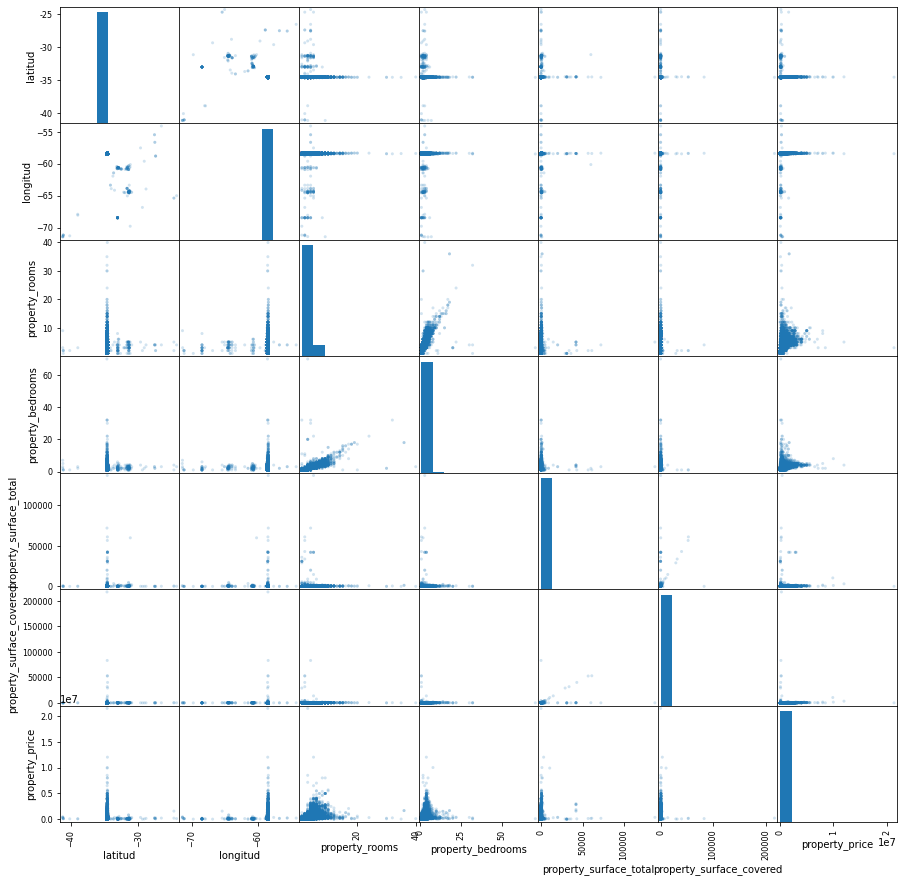

In [27]:
scatter_matrix(conjunto_entrenamiento_reducido.copy(), alpha=0.2, figsize= (15, 15))

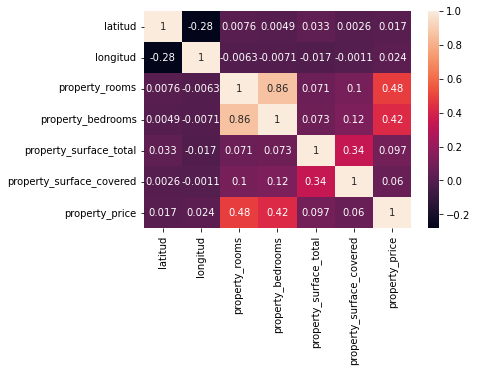

In [30]:
correlacion_matrix = conjunto_entrenamiento_reducido.corr()
grafico_correlacion=sns.heatmap(correlacion_matrix,annot=True)

Podemos ver que existe una correlacion positiva importante entre property_rooms y property_bedrooms, que puede parecer logico ya que dormitorios representan la mayoria de las habitaciones de una propiedad. Ademas, podemos notar que existe una correlacion entre property_price, property_rooms y property_rooms, tambien parece logico ya que el precio de una propiedad depende en gran medida del numero de habitaciones. 

Una correlacion positiva tambien parece existir entre property_surface_total y property_surface_covered porque en nucleos urbanos como Buenos Aires, la superficie cubierta por las propiedades suele ser ligeramente inferior o igual a la superficie total.

Por fin, hay una correlacion negativa entre latitud y longitud que se puede explicar con el hecho de que las limites de la ciudad son definidas geograficamente y no se pueden superar.

## b. Visualizacion de los datos

### Latitud - Longitud

Vamos a hacer dos box plot para esas variables y despues proponer un scatter plot para mostrar la correlacion entre la longitud y la longitud

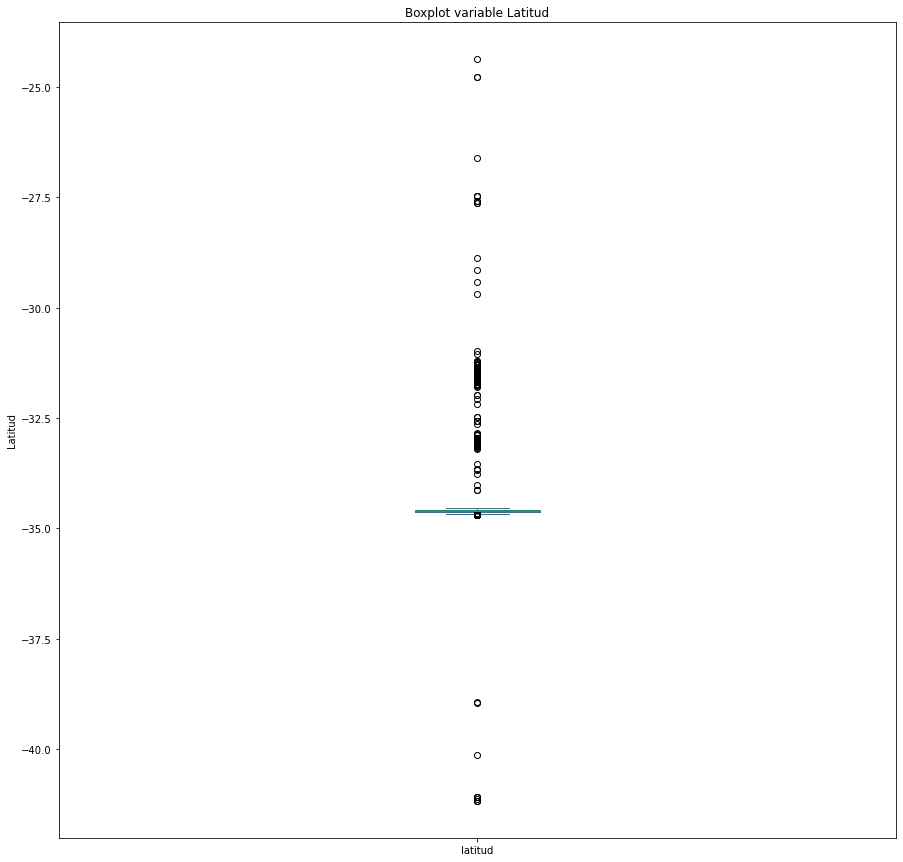

In [ ]:
# Box Plot - Latitud

box_plot_latitud=conjunto_entrenamiento_reducido['latitud'].plot.box(title="Boxplot variable Latitud",
                               xlabel="",
                               ylabel="Latitud", figsize=(15,15))

Podemos ver que hay muchos valores atipicos para esta variable y que sera necesario tratarlos.

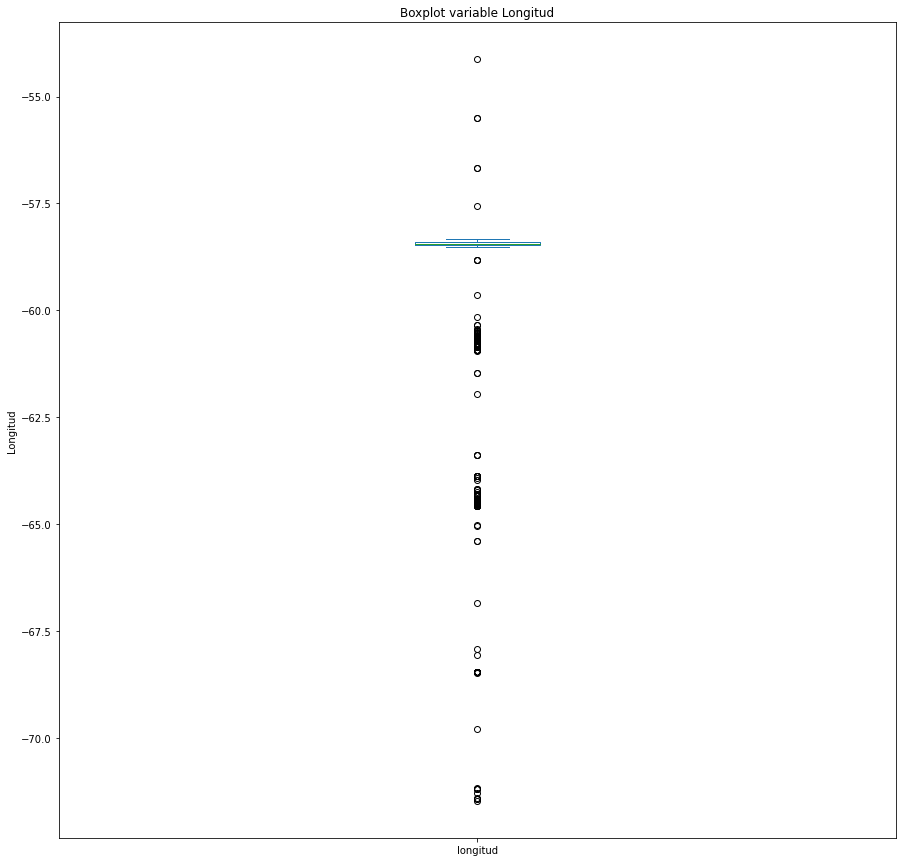

In [ ]:
# Box Plot - Longitud

box_plot_longitud=conjunto_entrenamiento_reducido['longitud'].plot.box(title="Boxplot variable Longitud",
                               xlabel="",
                               ylabel="Longitud", figsize=(15,15))

Podemos hacer la misma conclusion con este variable y sus outliers.

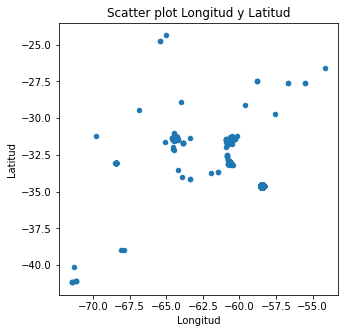

In [ ]:
# Scatter plot - Latitud y Longitud

scatter_plot_longitud_latitud=conjunto_entrenamiento_reducido.plot.scatter(title="Scatter plot Longitud y Latitud", 
                x='longitud', y='latitud',
                xlabel='Longitud', ylabel='Latitud',
                figsize=(5,5))

Podemos ver una gran concentracion de puntos en el centro del grafico, lo que puede corresponder a la posicion de las propiedades en la Capital Federal. Pero hay muchos valores atipicos, como anotado antes, que debemos eliminar o rectificar.

### Place_L3 - Place_L4

Vamos a hacer un grafico de barras para esas variables

<AxesSubplot:title={'center':'Gráfico de barras variable Place_L3'}, xlabel='Place_L3', ylabel='Frecuencia'>

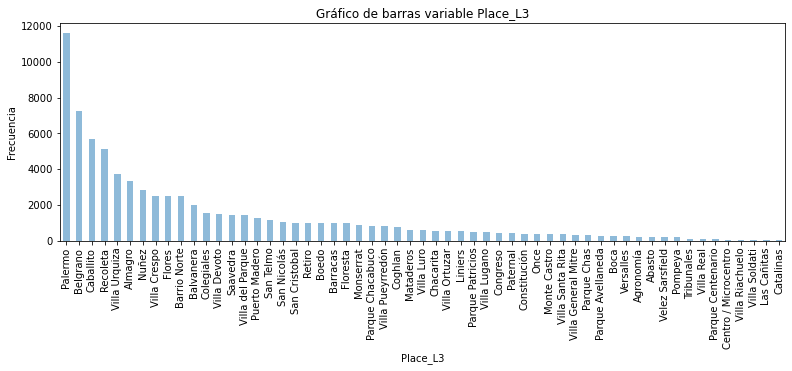

In [ ]:
# Grafico de barras - Place_L3

barras_place_l3=conjunto_entrenamiento_reducido['place_l3'].value_counts().plot.bar(alpha=0.5,
                                                      title="Gráfico de barras variable Place_L3",
                                                      xlabel="Place_L3" ,
                                                      ylabel="Frecuencia",
                                                      figsize=(13,4))

Podemos ver una alta concentracion de las propiedades en Palermo, lo que vamos a verificar en una proxima parte con los puntos geograficos.

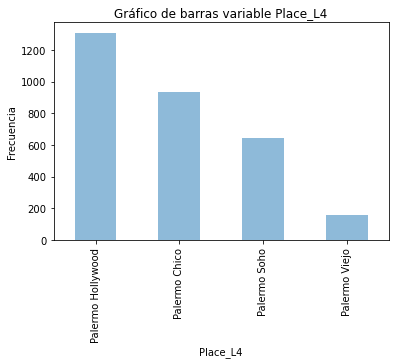

In [ ]:
# Grafico de barras - Place_L4

barras_place_l4=conjunto_entrenamiento_reducido['place_l4'].value_counts().plot.bar(alpha=0.5,
                                                      title="Gráfico de barras variable Place_L4",
                                                      xlabel="Place_L4" ,
                                                      ylabel="Frecuencia")

### Property Type

Vamos a hacer un grafico de barras para esa variable

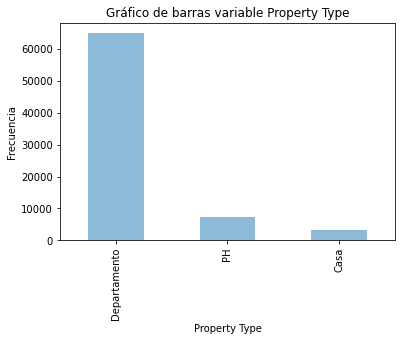

In [ ]:
# Grafico de barras - Property Type

barras_property_type=conjunto_entrenamiento_reducido['property_type'].value_counts().plot.bar(alpha=0.5,
                                                      title="Gráfico de barras variable Property Type",
                                                      xlabel="Property Type" ,
                                                      ylabel="Frecuencia")

La mayoria de las propiedades son departamento, por lo que las estimaciones de precios para PH y casas no seran tan exactas.

### Property Surface Total - Property Surface Covered

Vamos a hacer por cada variable un grafico de densidad y un box plot para ver la distribucion total de los valores y para ver si existen outliers. Tambien, como las variables parecen correladas, vamos a hacer un scatter plot entre los dos.

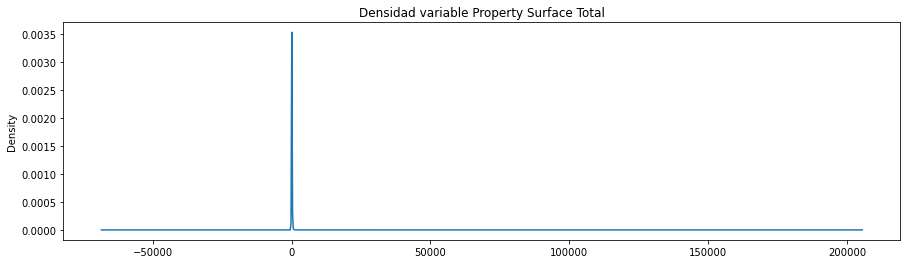

In [ ]:
# Grafico de densidad - Property Surface Total

densidad_property_surface_total=conjunto_entrenamiento_reducido['property_surface_total'].plot.kde(title="Densidad variable Property Surface Total",xlabel="Property Surface Total",ylabel="Densidad", figsize=(15,4))

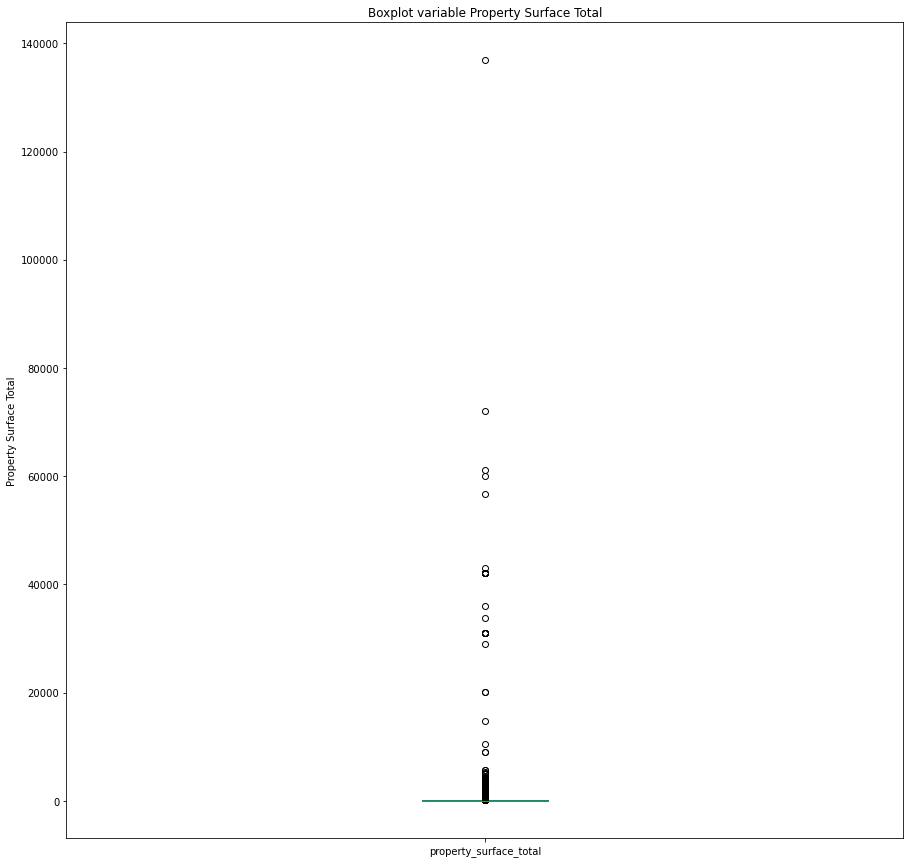

In [ ]:
# Box Plot - Property Surface Total

box_plot_property_surface_total=conjunto_entrenamiento_reducido['property_surface_total'].plot.box(title="Boxplot variable Property Surface Total",
                               xlabel="",
                               ylabel="Property Surface Total", figsize=(15,15))

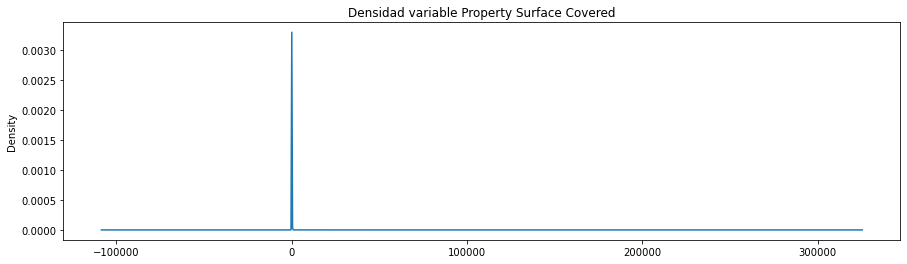

In [ ]:
# Grafico de densidad - Property Surface Covered

densidad_property_surface_covered=conjunto_entrenamiento_reducido['property_surface_covered'].plot.kde(title="Densidad variable Property Surface Covered",xlabel="Property Surface Covered",ylabel="Densidad", figsize=(15,4))

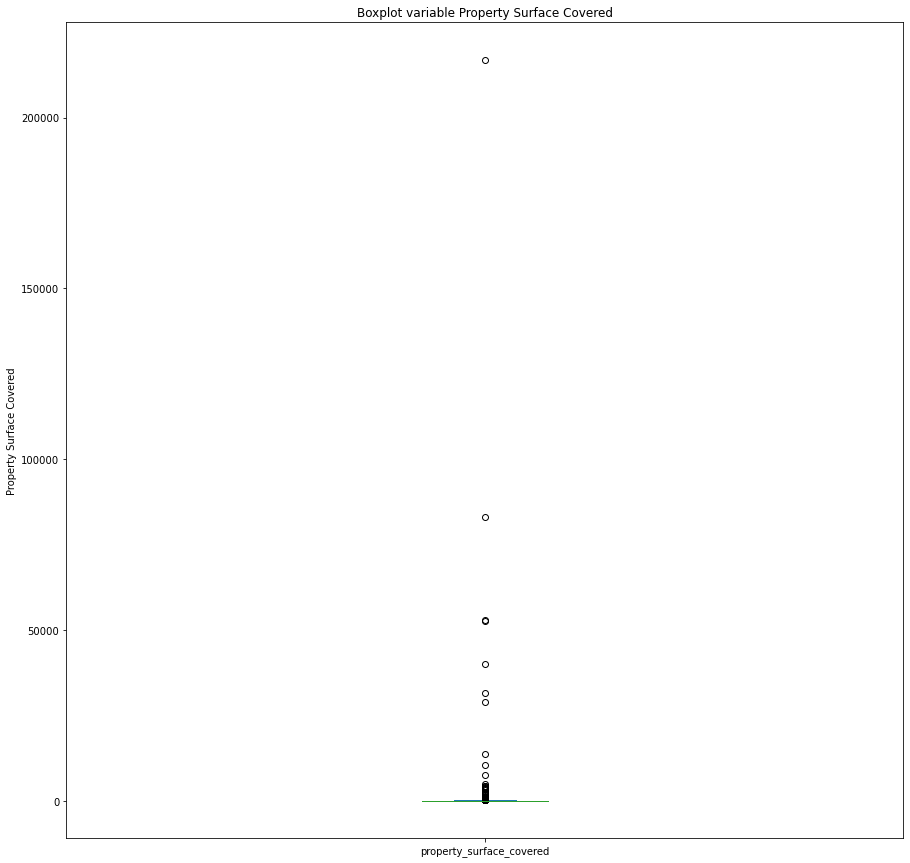

In [ ]:
# Box Plot - Property Surface Covered

box_plot_property_surface_covered=conjunto_entrenamiento_reducido['property_surface_covered'].plot.box(title="Boxplot variable Property Surface Covered",
                               xlabel="",
                               ylabel="Property Surface Covered", figsize=(15,15))

Es muy dificil hacer conclusiones sobre esas variables, necesitamos tratarlas para tener una distribucion mas adecuada.

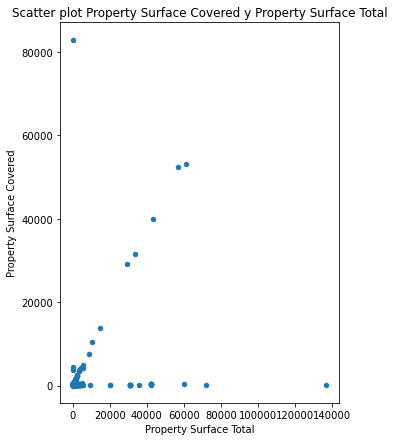

In [ ]:
# Scatter plot - Property Surface Covered y Property Surface Total

scatter_plot_property_surface_covered_total=conjunto_entrenamiento_reducido.plot.scatter(title="Scatter plot Property Surface Covered y Property Surface Total", 
                x='property_surface_total', y='property_surface_covered',
                xlabel='Property Surface Total', ylabel='Property Surface Covered',
                figsize=(5,7))

Hay entonces una correlacion linear positiva entre esas variables.

### Property Rooms - Property Bedrooms

Vamos a hacer por cada variable un histograma para ver la distribucion de manera discreta (porque los valores son enteros). Tambien, como las variables parecen correladas, vamos a hacer un scatter plot entre los dos.

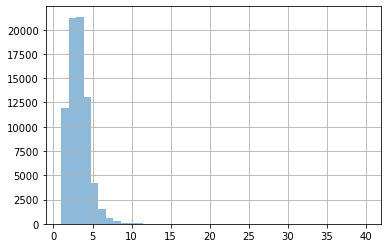

In [ ]:
# Histograma - Property Rooms

hist_property_rooms=conjunto_entrenamiento_reducido['property_rooms'].hist(alpha=0.5,bins=41)

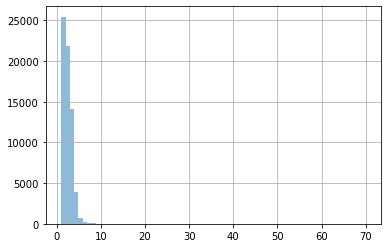

In [ ]:
# Histograma - Property Bedrooms

hist_property_bedrooms=conjunto_entrenamiento_reducido['property_bedrooms'].hist(alpha=0.5,bins=71)

La mayoria de las propiedades tienen de 1 a 4 habitaciones con 1 a 3 dormitorios.

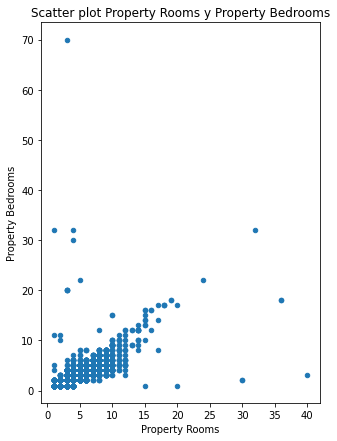

In [ ]:
# Scatter plot - Property Rooms y Property Bedrooms

scatter_plot_property_rooms_bedrooms=conjunto_entrenamiento_reducido.plot.scatter(title="Scatter plot Property Rooms y Property Bedrooms", 
                x='property_rooms', y='property_bedrooms',
                xlabel='Property Rooms', ylabel='Property Bedrooms',
                figsize=(5,7))

Hay entonces una correlacion linear positiva entre esas variables.


Podemos tambien hacer dos scatter plot entre Property Rooms y Property Price, y entre Property Bedrooms y Property Price, para verificar que existe correlaciones lineares.

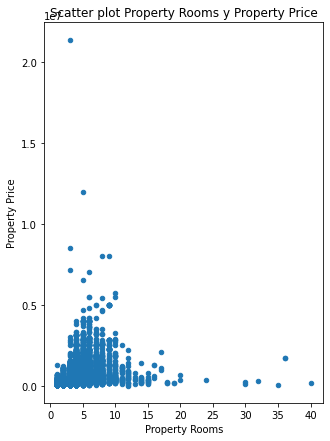

In [ ]:
# Scatter plot - Property Rooms y Property Price

scatter_plot_property_rooms_price=conjunto_entrenamiento_reducido.plot.scatter(title="Scatter plot Property Rooms y Property Price", 
                x='property_rooms', y='property_price',
                xlabel='Property Rooms', ylabel='Property Price',
                figsize=(5,7))

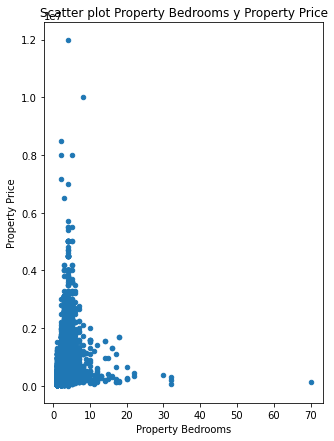

In [ ]:
# Scatter plot - Property Bedrooms y Property Price

scatter_plot_property_bedrooms_price=conjunto_entrenamiento_reducido.plot.scatter(title="Scatter plot Property Bedrooms y Property Price", 
                x='property_bedrooms', y='property_price',
                xlabel='Property Bedrooms', ylabel='Property Price',
                figsize=(5,7))

Las correlaciones son mucho menos visibles, lo que se traduce en un coeficiente de correlacion mas bajo, como se ha senalado anteriormente.

### Property Price

Vamos a hacer un grafico de densidad y un box plot para ver la distribucion total de los valores y para ver si existen outliers.

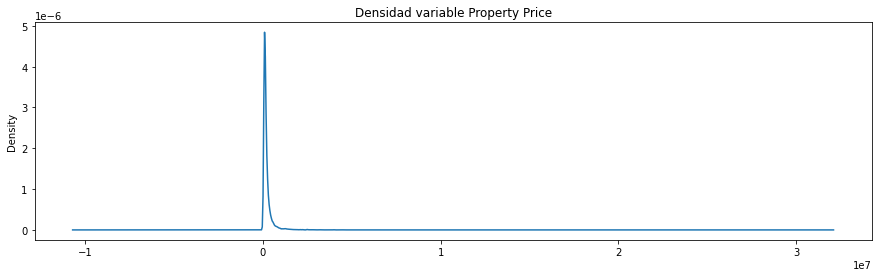

In [ ]:
# Grafico de densidad - Property Price

densidad_property_price=conjunto_entrenamiento_reducido['property_price'].plot.kde(title="Densidad variable Property Price",xlabel="Property Price",ylabel="Densidad", figsize=(15,4))

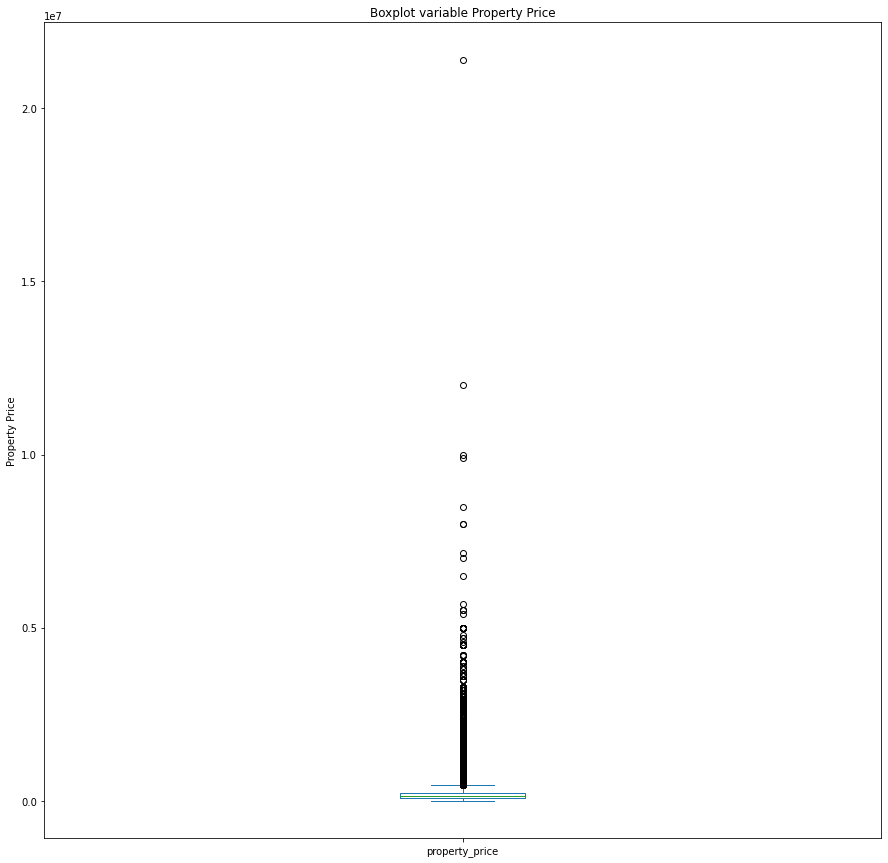

In [ ]:
# Box Plot - Property Price

box_plot_property_price=conjunto_entrenamiento_reducido['property_price'].plot.box(title="Boxplot variable Property Price",
                               xlabel="",
                               ylabel="Property Price", figsize=(15,15))

Es tambien dificil de hacer conclusiones, pero la mayoria de los precios estan debajo de 100 000$.